# Intro to NLP in TensorFlow

NLP has the goal of deriving information out of natural language( could be sequences text or speech)
Another comman term for NLP problem is sequence to sequence problem(seq2seq).

In [ ]:
!nvidia-smi

Mon Mar 13 15:17:02 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    25W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py


--2023-03-13 15:17:12--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-03-13 15:17:12 (83.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]



## Get helper functions

In [ ]:
from helper_functions import unzip_data, create_tensorboard_callback,plot_loss_curves,compare_historys

## Get a text dataset
The dataset we're going to using is Kaggle intro to NLP dataset ( text samples of tweet labelled as disaster or not disaster)

In [ ]:
# Download data (same as from Kaggle)
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"
#unzip data
unzip_data("nlp-getting-started.zip")

--2023-03-13 15:17:24--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.143.128, 108.177.96.128, 108.177.127.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.143.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  1.28MB/s    in 0.5s    

2023-03-13 15:17:24 (1.28 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



## Visualizing text dataset

In [ ]:
import pandas as pd

train_df=pd.read_csv("train.csv")

test_df=pd.read_csv("test.csv")

In [ ]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train_df["text"][1]

'Forest fire near La Ronge Sask. Canada'

In [ ]:
# Shuffle training dataframe
train_df_shuffled=train_df.sample(frac=1,random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
#How many example of each class are there
train_df["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
# Total samples
len(train_df),len(test_df)

(7613, 3263)

In [ ]:
# Visualize random training example
import random
random_index=random.randint(0,len(train_df)-5)
for row in train_df_shuffled[["text","target"]][random_index:random_index+5].itertuples():
    _,text,target=row
    print(f"Target:{target}","(real disaster)" if target>0 else "(not real disaster)")
    print(f"Text:\n{text}\n")
    print("----\n")

Target:1 (real disaster)
Text:
Woodlawn Shooting Wounds 79-Year-Old Woman Teen - Woodlawn - http://t.co/nu3XXn55vS Chicago http://t.co/XNGrfNQSx3

----

Target:0 (not real disaster)
Text:
My dogÛªs just blown his kennel up ÛÒ Bloody Yorkshire Terrorist

----

Target:0 (not real disaster)
Text:
I chose you so if we can search for the joy of just the two of us WeÛªll be near smiles no matter what cold flames burn our bod #PortgassDK

----

Target:1 (real disaster)
Text:
#weed news How marijuana is making California drought worse - Christian Science Monitor http://t.co/2SZ7oKjRXi

----

Target:1 (real disaster)
Text:
#SigAlert: North &amp; Southbound 133 closed btwn 5 fwy and Irvine Blvd due to truck fire. CHP is detouring traffic.

----



## Split data into training and validation sets

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
# Use train_test_ split to split training data into training and validation sets
train_sentences,val_sentences,train_labels,val_labels=train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                      train_df_shuffled["target"].to_numpy(),
                                                                      test_size=0.1,
                                                                      random_state=42
                                                                      )

In [ ]:
#Check len
len(train_sentences),len(train_labels),len(val_sentences),len(val_labels)

(6851, 6851, 762, 762)

In [ ]:
#Check the samples
train_sentences[:10],train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

# Converting Text into Numbers
When dealing with text problem, one of first thing you will gonna do is to convert text to numbers, ways to do these are:
* Tokenziation - direct mapping of a token(word or character ) to a number.
* Embedding - create a matrix of feature vectors of each token, size can be defined and it can be learned.

In [ ]:
train_sentences[:10]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk',
       '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
       'destroy the free fandom honestly',
       'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
       '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
       'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
      dtype=object)

## Text vectorization (tokenization)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# Use the defalut TextVectorization parameters
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None) # how long should the output sequence of tokens be?
                                    # pad_to_max_tokens=True) # Not valid if using max_tokens=None

In [ ]:
 # Find the average number of tokens (words) in the training tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))  

15

In [ ]:
# Setup text vectorization variables
max_vocab_length=10000 # max number of words to have in our vocabulary
max_length=15 # max length of our sequences will be ( how many words from a tweet our model sees?)
text_vectorizer=TextVectorization(max_tokens=max_vocab_length,
                                 output_mode="int",
                                 output_sequence_length=max_length, 
                                 )

In [ ]:
# Fit the text vectorizer to the training 
text_vectorizer.adapt(train_sentences)

In [ ]:
# Create a sample sentence and tokenize it
sample_sentence="There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
# Choose a random sentences from training dataset and tokenize it
random_sentence=random.choice(train_sentences)
print(f"Original text :\n {random_sentence} \n \n Vectorized version:")
text_vectorizer([random_sentence])

Original text :
 A Marshall Plan for the United States by Dambisa Moyo via @ProSyn #oped http://t.co/GnPStnvi5G via @po_st 
 
 Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[   3, 5160,  241,   10,    2,  800, 1253,   18, 5867, 5086,   49,
        4847, 4992,    1,   49]])>

In [ ]:
# Get the unique words in vocabulary
words_in_vocab=text_vectorizer.get_vocabulary() # Get all unique words in train data
top_5_words=words_in_vocab[:5]# get most comman words
bottom_5_words=words_in_vocab[-5:]
print(f"Number of words in vocab:{len(words_in_vocab)}\n")
print(f"5 most comman words:{top_5_words}\n")
print(f"5 least comman words:{bottom_5_words}")

Number of words in vocab:10000

5 most comman words:['', '[UNK]', 'the', 'a', 'in']

5 least comman words:['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


## Creating an Embedding using Embedding layer



In [ ]:
from tensorflow.keras import layers

embedding=layers.Embedding(input_dim=max_vocab_length, #Input shape
                           output_dim=128,
                           input_length=max_length # How long is each input
                          )
embedding

In [ ]:
# Get a random sentence from the training set
random_sentence=random.choice(train_sentences)
print(f"Original text:\n {random_sentence} \n\n Embedded version:")

# Embed the random sentence ( turn it into dense vector of fixed size)
sample_embed=embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
 Me pulling over and fighting the hoes that called Zayn a terrorist  http://t.co/FY30fV0Qbx 

 Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.00237169, -0.00968661,  0.04656602, ..., -0.02186228,
          0.01921448, -0.0168672 ],
        [ 0.00388069, -0.01575743, -0.00309294, ..., -0.04421526,
          0.0384897 , -0.0289856 ],
        [-0.0229818 , -0.04251814,  0.00531583, ..., -0.03799275,
         -0.0470774 , -0.01001848],
        ...,
        [-0.03654382, -0.01027132, -0.00522352, ..., -0.02702843,
          0.00844718,  0.00455336],
        [ 0.02285993, -0.04227626,  0.01199256, ..., -0.02573767,
         -0.02052032, -0.00146844],
        [ 0.02285993, -0.04227626,  0.01199256, ..., -0.02573767,
         -0.02052032, -0.00146844]]], dtype=float32)>

In [ ]:
# Check out a single token embedding
sample_embed[0][0],sample_embed[0][0].shape,random_sentence

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([ 0.00237169, -0.00968661,  0.04656602, -0.03033717,  0.04609189,
         0.00140361,  0.00053631, -0.02028385, -0.02288202,  0.0449557 ,
         0.03786726,  0.02983857, -0.03273205, -0.00748779, -0.02122357,
         0.01774717, -0.02538806,  0.0023067 ,  0.03983083, -0.02907622,
         0.04400109, -0.00491367, -0.01552824, -0.00397383,  0.03041948,
        -0.0360558 , -0.01758232, -0.03271081,  0.04783318,  0.0358079 ,
         0.00991608, -0.03597474, -0.04587463,  0.02496526, -0.03113008,
        -0.01664604, -0.03735084,  0.00134755, -0.04555521, -0.00429022,
        -0.01518183, -0.03704578, -0.00638056,  0.03983653,  0.0129243 ,
         0.03720272,  0.03820636, -0.00435139,  0.00707824,  0.00339569,
        -0.03877985, -0.03626981, -0.02505749,  0.02288386,  0.0203483 ,
         0.00218504,  0.02440754,  0.04470786, -0.04315951, -0.01123453,
         0.04908333,  0.04554249,  0.03079244, -0.03131387, -0.0061833 ,
  

## Model 0 : Base line (Sklearn Multinomial naive bayes)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer #Convert text into numbers
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

#Create tokenization and modelling pipeline

model_0=Pipeline([
    ("tfidf",TfidfVectorizer()),# Convert words to numbers 
    ("clf",MultinomialNB()) # Model the text
])

# Fit the pipeline to training data
model_0.fit(train_sentences,train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

## Evaluate baseline model

In [ ]:
baseline_score=model_0.score(val_sentences,val_labels)
baseline_score

0.7926509186351706

In [ ]:
train_df["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
#Make predictions
baseline_preds=model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

## Creating Evaluation function for our model experiments

In [ ]:
from sklearn.metrics import accuracy_score,precision_recall_fscore_support

def calculate_results(y_true,y_pred):
    #Calculte model accuracy
    model_accuracy=accuracy_score(y_true,y_pred)*100
    #Calculate model pression,recall and f1-score using "weighted" average
    model_precision,model_recall,model_f1,_=precision_recall_fscore_support(y_true,y_pred,average="weighted")
    model_results={"accuracy":model_accuracy,
                   "precision":model_precision,
                   "recall":model_recall,
                   "f1":model_f1
                  }
    return model_results

In [ ]:
# Get baseleine results
baseline_results=calculate_results(y_true=val_labels,y_pred=baseline_preds)

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Model 1 : Simple dense model

In [ ]:
# Create tensorboard callback
from helper_functions import create_tensorboard_callback

# Create a directoy to  save tensor logs
save_dir="model_logs"

In [ ]:
#  Build model with functional api
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,),dtype=tf.string) #inputs are 1-dim strings
x=text_vectorizer(inputs) #turn input text into numbers
x=embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs=layers.Dense(1,activation="sigmoid")(x) #want binary output so sigmoid
model_1=tf.keras.Model(inputs,outputs,name="model_1_dense")

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
# Compile the model
model_1.compile(
   loss=tf.keras.losses.BinaryCrossentropy(),
   optimizer=tf.keras.optimizers.Adam(),
   metrics=["accuracy"] 
)

In [ ]:
# Fit the model
model_1_history=model_1.fit(x=train_sentences,
                            y=train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(dir_name=save_dir,
                                                                   experiment_name="model_1_dense"
                                                                  )]
                           )

Saving TensorBoard log files to: model_logs/model_1_dense/20230309-151723
Epoch 1/5
215/215 [==============================] - 24s 78ms/step - loss: 0.6130 - accuracy: 0.6906 - val_loss: 0.5394 - val_accuracy: 0.7520
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.4436 - accuracy: 0.8175 - val_loss: 0.4688 - val_accuracy: 0.7861
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.3481 - accuracy: 0.8586 - val_loss: 0.4606 - val_accuracy: 0.7966
Epoch 4/5
215/215 [==============================] - 1s 7ms/step - loss: 0.2844 - accuracy: 0.8920 - val_loss: 0.4625 - val_accuracy: 0.7874
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.2385 - accuracy: 0.9121 - val_loss: 0.4857 - val_accuracy: 0.7927


In [ ]:
#Check the results
model_1.evaluate(val_sentences,val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4857 - accuracy: 0.7927


[0.4856875240802765, 0.7926509380340576]

In [ ]:
#Make some predictions and evaluate those
model_1_pred_probs=model_1.predict(val_sentences)
model_1_pred_probs.shape

24/24 [==============================] - 0s 2ms/step


(762, 1)

In [ ]:
model_1_preds=tf.squeeze(tf.round(model_1_pred_probs))

In [ ]:
#Calculate results
model_1_results=calculate_results(y_true=val_labels,y_pred=model_1_preds)

In [ ]:
model_1_results

{'accuracy': 79.26509186351706,
 'precision': 0.8008492102900203,
 'recall': 0.7926509186351706,
 'f1': 0.7888220986443327}

In [ ]:
#Baseline outperforming Neural network
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False,  True])

## Visualizing learned embeddings

In [ ]:
# Get the vocabulary from the text vectorization layer
words_in_vocab=text_vectorizer.get_vocabulary()
len(words_in_vocab)

10000

In [ ]:
# Model 1 summary
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
# Get the weight matrix pf embedding layer
embed_weights=model_1.get_layer("embedding").get_weights()[0]

In [ ]:
embed_weights.shape #same size as vocab size and embedding dim

(10000, 128)

In [ ]:
vocab=words_in_vocab
weights=embed_weights

In [ ]:
#Create embedding files
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

 ## Recurrent Neural Network (RNN)
RNN's are useful for sequence data.
The premise of a RNN is to use the representation of previous input to aid the representation of a later input

## Model 2: LSTM
LSTM =Long sort term memory (one of most popular LSTM cells)

In [ ]:
# Create LSTM model
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,),dtype=tf.string)
x=text_vectorizer(inputs)
x=embedding(x)
# print(x.shape)
# x=layers.LSTM(units=64,return_sequences=True) (x)#64 hidden units
# print(x.shape)
x=layers.LSTM(64)(x)
# print(x.shape)
# x=layers.Dense(64,activation="relu")(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_2=tf.keras.Model(inputs,outputs,name="model_2_LSTM")

In [ ]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [ ]:
#Compile the model
model_2.compile( loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
               )

In [ ]:
#Fit the model 
model_2_history=model_2.fit(train_sentences,
                            train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(save_dir,
                                                                   "model_2_LSTM"
                                                                  )]
                           )

Saving TensorBoard log files to: model_logs/model_2_LSTM/20230309-151756
Epoch 1/5
215/215 [==============================] - 13s 38ms/step - loss: 0.2268 - accuracy: 0.9232 - val_loss: 0.5503 - val_accuracy: 0.7822
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.1583 - accuracy: 0.9426 - val_loss: 0.6250 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1307 - accuracy: 0.9520 - val_loss: 0.6760 - val_accuracy: 0.7900
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1033 - accuracy: 0.9616 - val_loss: 0.7879 - val_accuracy: 0.7822
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0807 - accuracy: 0.9676 - val_loss: 0.8897 - val_accuracy: 0.7795


In [ ]:
# Make prediction with LSTM model
model_2_pred_probs=model_2.predict(val_sentences)
model_2_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[1.09129295e-01],
       [9.05074418e-01],
       [9.99507904e-01],
       [7.61133060e-02],
       [4.25049657e-04],
       [9.96040463e-01],
       [7.26443410e-01],
       [9.99608576e-01],
       [9.99240518e-01],
       [5.31031787e-01]], dtype=float32)

In [ ]:
# Convert model2 pred probs to labels
model_2_preds=tf.squeeze(tf.round(model_2_pred_probs))

In [ ]:
#Calculate model 2 results
model_2_results=calculate_results(y_true=val_labels,y_pred=model_2_preds)

In [ ]:
model_2_results

{'accuracy': 77.95275590551181,
 'precision': 0.7799065773530309,
 'recall': 0.7795275590551181,
 'f1': 0.7783167829714759}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

## Model 3 :GRU
GRU states for gated recurrent unit.
GRU cell has similar feature to an LSTM but has less parameters

In [ ]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
from tensorflow.keras import layers
model_3_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_3")

# Build an RNN using the GRU cell
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_3_embedding(x)
# x = layers.GRU(64, return_sequences=True) # stacking recurrent cells requires return_sequences=True
x = layers.GRU(64)(x) 
# x = layers.Dense(64, activation="relu")(x) # optional dense layer after GRU cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [ ]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [ ]:
# Compile GRU model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(save_dir ,"GRU")])

Saving TensorBoard log files to: model_logs/GRU/20230309-151821
Epoch 1/5
215/215 [==============================] - 11s 36ms/step - loss: 0.5229 - accuracy: 0.7335 - val_loss: 0.4545 - val_accuracy: 0.7743
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3178 - accuracy: 0.8708 - val_loss: 0.4947 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 3s 16ms/step - loss: 0.2183 - accuracy: 0.9184 - val_loss: 0.5660 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.1577 - accuracy: 0.9447 - val_loss: 0.6150 - val_accuracy: 0.7822
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1204 - accuracy: 0.9581 - val_loss: 0.6013 - val_accuracy: 0.7769


In [ ]:
# Make predictions on the validation data
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs.shape, model_3_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


((762, 1), array([[0.40286952],
        [0.88402605],
        [0.9970101 ],
        [0.14055683],
        [0.01461776],
        [0.9876079 ],
        [0.6913437 ],
        [0.99666303],
        [0.996621  ],
        [0.52531064]], dtype=float32))

In [ ]:
# Convert prediction probabilities to prediction classes
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Calcuate model_3 results
model_3_results = calculate_results(y_true=val_labels, 
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 77.69028871391076,
 'precision': 0.7767817074616054,
 'recall': 0.7769028871391076,
 'f1': 0.7760612229809302}

## Model 4: Bidirectional RNN
 

In [ ]:
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,),dtype=tf.string)
x=text_vectorizer(inputs)
x=embedding(x)
# x=layers.Bidirectional(layers.LSTM(64,return_sequences=True))(x)
x=layers.Bidirectional(layers.LSTM(64))(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_4=tf.keras.Model(inputs,outputs,name="model_4_bidirectional")

In [ ]:
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,3

In [ ]:
#Compile model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
               )

In [ ]:
#Fit model
model_4_history=model_4.fit(train_sentences,
                            train_labels,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(save_dir ,"Model_4_Bidirectional")]
                           )

Saving TensorBoard log files to: model_logs/Model_4_Bidirectional/20230309-151845
Epoch 1/5
215/215 [==============================] - 13s 38ms/step - loss: 0.1312 - accuracy: 0.9571 - val_loss: 0.8011 - val_accuracy: 0.7848
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0753 - accuracy: 0.9711 - val_loss: 1.0430 - val_accuracy: 0.7782
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0568 - accuracy: 0.9749 - val_loss: 1.2890 - val_accuracy: 0.7690
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0534 - accuracy: 0.9745 - val_loss: 1.1404 - val_accuracy: 0.7664
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0479 - accuracy: 0.9775 - val_loss: 1.3335 - val_accuracy: 0.7664


In [ ]:
#Make predictions
model_4_pred_probs=model_4.predict(val_sentences)

24/24 [==============================] - 1s 3ms/step


In [ ]:
model_4_preds=tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
#Calculate the result of bidirectional model
model_4_results=calculate_results(y_true=val_labels,
                                  y_pred=model_4_preds
                                 )

In [ ]:
model_4_results

{'accuracy': 76.64041994750657,
 'precision': 0.7662194035303838,
 'recall': 0.7664041994750657,
 'f1': 0.7662905954702527}

## Convolutional Neural Network for Text (and other type of sequences)

In [ ]:
# Testing out our embedding layer ,Conv1D layer and max pooling
embedding_test=embedding(text_vectorizer(["This is a test sentence"])) #turn target sentence into embedding
conv_1d=layers.Conv1D(filters=32,
                      kernel_size=5,
                      activation="relu",
                      padding="same" # valid me output samller hoga
                     )
conv_1d_output=conv_1d(embedding_test)#pass test  embedding through conv1d layer
max_pool=layers.GlobalMaxPool1D()
max_pool_output=max_pool(conv_1d_output)# getting most important feature
embedding_test.shape,conv_1d_output.shape,max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 15, 32]), TensorShape([1, 32]))

In [ ]:
embedding_test

<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.03744745, -0.00134166,  0.04512056, ...,  0.03022231,
          0.02399519, -0.00150355],
        [-0.05004394, -0.09460915,  0.01151084, ...,  0.0550012 ,
          0.06716085,  0.01560022],
        [ 0.01641557, -0.03360842, -0.00302744, ..., -0.02720496,
          0.0046132 , -0.04023582],
        ...,
        [-0.00657872, -0.01510202, -0.0149211 , ...,  0.02135514,
          0.00605814,  0.01404862],
        [-0.00657872, -0.01510202, -0.0149211 , ...,  0.02135514,
          0.00605814,  0.01404862],
        [-0.00657872, -0.01510202, -0.0149211 , ...,  0.02135514,
          0.00605814,  0.01404862]]], dtype=float32)>

In [ ]:
conv_1d_output

<tf.Tensor: shape=(1, 15, 32), dtype=float32, numpy=
array([[[0.00000000e+00, 0.00000000e+00, 4.59847972e-02, 0.00000000e+00,
         5.72145805e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         5.58117554e-02, 2.97931936e-02, 4.75079753e-02, 1.34966234e-02,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         1.31041437e-01, 4.21099924e-02, 4.77294344e-03, 1.17749721e-03,
         2.65747011e-02, 5.90411201e-02, 2.85828859e-02, 2.48790570e-02,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 1.57415587e-02, 0.00000000e+00, 5.68654165e-02],
        [0.00000000e+00, 3.56220417e-02, 0.00000000e+00, 4.91926149e-02,
         0.00000000e+00, 0.00000000e+00, 2.69341823e-02, 7.13590235e-02,
         1.16104428e-02, 0.00000000e+00, 3.03045437e-02, 3.85258496e-02,
         0.00000000e+00, 7.74373021e-03, 3.38190459e-02, 7.29913861e-02,
         5.04715480e-02, 5.99042028e-02, 5.52333221e-02, 0.00000000e+0

In [ ]:
max_pool_output

<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[0.06647246, 0.08500604, 0.05590281, 0.04919261, 0.09866133,
        0.06571737, 0.02693418, 0.07135902, 0.05734516, 0.09391266,
        0.04750798, 0.08624576, 0.02339004, 0.02716173, 0.06628595,
        0.07299139, 0.13104144, 0.0599042 , 0.05615149, 0.00390379,
        0.03053493, 0.05904112, 0.03872872, 0.06308231, 0.01288292,
        0.06478588, 0.0205134 , 0.06016756, 0.06414004, 0.07804201,
        0.04433396, 0.05686542]], dtype=float32)>

In [ ]:
# Create 1 Dim CNN to model sequences
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,),dtype=tf.string)
x=text_vectorizer(inputs)
x=embedding(x)
x=layers.Conv1D(filters=64,kernel_size=5,padding="valid",activation="relu",strides=1)(x)
x=layers.GlobalMaxPool1D()(x)
#x=layers.Dense(64,act=relu)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_5=tf.keras.Model(inputs,outputs,name="model_5_Conv1D")

#Compile
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
               )


#Summary
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 1)              

In [ ]:
#Fit the model
model_5_history=model_5.fit(train_sentences,
                           train_labels,
                           epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(save_dir,"Conv1D")]
                           )

Saving TensorBoard log files to: model_logs/Conv1D/20230309-151914
Epoch 1/5
215/215 [==============================] - 11s 37ms/step - loss: 0.1384 - accuracy: 0.9548 - val_loss: 0.8139 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0855 - accuracy: 0.9677 - val_loss: 0.9660 - val_accuracy: 0.7717
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0684 - accuracy: 0.9745 - val_loss: 1.0435 - val_accuracy: 0.7756
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0601 - accuracy: 0.9766 - val_loss: 1.1118 - val_accuracy: 0.7664
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0535 - accuracy: 0.9777 - val_loss: 1.1811 - val_accuracy: 0.7703


In [ ]:
#Make some predictions
model_5_pred_probs=model_5.predict(val_sentences)
model_5_pred_probs[:5]

24/24 [==============================] - 0s 2ms/step


array([[2.7349836e-01],
       [6.7196393e-01],
       [9.9995029e-01],
       [8.5592672e-02],
       [4.0238587e-07]], dtype=float32)

In [ ]:
#Convert model 5 pred probs to labels
model_5_preds=tf.squeeze(tf.round(model_5_pred_probs))

In [ ]:
#Evaluate predictions
model_5_results=calculate_results(y_true=val_labels,y_pred=model_5_preds)
model_5_results

{'accuracy': 77.03412073490814,
 'precision': 0.7711671866902318,
 'recall': 0.7703412073490814,
 'f1': 0.7686901866564684}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

# Model 6: Tensorflow Hub Pretrained Sentence Encoder

In [ ]:
# Example of pretrained embedding with universal sentence encoder - https://tfhub.dev/google/universal-sentence-encoder/4
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-large/5") # load Universal Sentence Encoder
embed_samples = embed([sample_sentence,
                      "When you call the universal sentence encoder on a sentence, it turns it into numbers."])

print(embed_samples[0][:50])

KeyboardInterrupt: ignored

In [ ]:
# Create keras layers using USE pretrained layer from tensorflow hub
model_4.save('Model_4',save_format="tf")

In [ ]:
embed_samples[0].shape

TensorShape([512])

In [ ]:
# Create keras layer using the USE pretrained layer from tensorflow hub
import tensorflow_hub as hub
sentence_encoder_layer=hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder-large/5",
                                input_shape=[],
                                dtype=tf.string,
                                trainable=False,
                                name="USE"
                                )

In [ ]:
# Create model using Sequential API
from tensorflow.keras import layers
model_6=tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64,activation="relu"),
    layers.Dense(1,activation="sigmoid",name="Output_layer")
],name="model_6_USE")

#Compile
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
                )


model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               147354880 
                                                                 
 dense_1 (Dense)             (None, 64)                32832     
                                                                 
 Output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 147,387,777
Trainable params: 32,897
Non-trainable params: 147,354,880
_________________________________________________________________


In [ ]:
#Fit the model
model_6_history=model_6.fit(train_sentences,
                            train_labels,
                            epochs=3,
                            validation_data=(val_sentences,val_labels),
                            # callbacks=[create_tensorboard_callback(save_dir,"tf_hub_sentence_encoder")]
                            )

Epoch 1/3
215/215 [==============================] - 57s 81ms/step - loss: 0.4989 - accuracy: 0.7920 - val_loss: 0.4311 - val_accuracy: 0.8123
Epoch 2/3
215/215 [==============================] - 11s 51ms/step - loss: 0.4008 - accuracy: 0.8278 - val_loss: 0.4147 - val_accuracy: 0.8150
Epoch 3/3
215/215 [==============================] - 12s 55ms/step - loss: 0.3819 - accuracy: 0.8321 - val_loss: 0.4126 - val_accuracy: 0.8228


In [ ]:
#Make predictions 
model_6_pred_probs=model_6.predict(val_sentences)

#Convert prediction probs
model_6_preds=tf.squeeze(tf.round(model_6_pred_probs))

#Calculate results
model_6_results=calculate_results(val_labels,model_6_preds)
model_6_results

NameError: ignored

In [ ]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
# Make predictions with the model
pred_probs = model_6.predict(test_df['text'].to_numpy())

# Convert prediction probs to labels
preds = tf.squeeze(tf.round(pred_probs))
preds = tf.cast(preds , dtype = tf.int32)

102/102 [==============================] - 10s 43ms/step


In [ ]:
submission = pd.DataFrame({'id': test_df['id'].values , 
                           'target': (preds.numpy())})
submission

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


In [ ]:
submission.to_csv('submission.csv' , index = False)

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

##  Model 7: TF Hub Pretrained USE with 10% of dataset


In [ ]:
#Note:Making data splits like below leads to data leakage (model_7 trained on 10% data,outperform model_6 trained on 100%)
#Dont make data splits which leak data from validation/test sets into training sets
train_10_percent=train_df_shuffled[["text","target"]].sample(frac=0.1,random_state=42)
train_sentences_10_percent=train_10_percent["text"].to_list()
train_labels_10_percent=train_10_percent["target"].to_list()

In [ ]:
#Making a better dataset split (no data leakage)
train_10_percent_split=int(0.1 *len(train_sentences))
train_10_percent_split
train_sentences_10_percent=train_sentences[:train_10_percent_split] 
train_labels_10_percent=train_labels[:train_10_percent_split] 

In [ ]:
#No of targets in our subset of data
train_10_percent["target"].value_counts()

0    413
1    348
Name: target, dtype: int64

In [ ]:
# Clone model_6 but reset weights
model_7 = tf.keras.models.clone_model(model_6)

# Compile model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary (will be same as model_6)
model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 Output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Fit the model to 10% training subset
model_7_history=model_7.fit(train_sentences_10_percent,
                            train_labels_10_percent,
                            epochs=5,
                            validation_data=(val_sentences,val_labels),
                            callbacks=[create_tensorboard_callback(save_dir,"tf_hub_sentence_encoder_10_percent")]
                            )

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_10_percent/20230309-152032
Epoch 1/5
22/22 [==============================] - 4s 48ms/step - loss: 0.6653 - accuracy: 0.6993 - val_loss: 0.6447 - val_accuracy: 0.7257
Epoch 2/5
22/22 [==============================] - 1s 27ms/step - loss: 0.5944 - accuracy: 0.7956 - val_loss: 0.5895 - val_accuracy: 0.7651
Epoch 3/5
22/22 [==============================] - 1s 28ms/step - loss: 0.5210 - accuracy: 0.8219 - val_loss: 0.5382 - val_accuracy: 0.7822
Epoch 4/5
22/22 [==============================] - 1s 50ms/step - loss: 0.4625 - accuracy: 0.8248 - val_loss: 0.5074 - val_accuracy: 0.7782
Epoch 5/5
22/22 [==============================] - 1s 51ms/step - loss: 0.4213 - accuracy: 0.8350 - val_loss: 0.4906 - val_accuracy: 0.7782


In [ ]:
#Make predictions
model_7_pred_probs=model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 1s 10ms/step


array([[0.20115642],
       [0.6065137 ],
       [0.89488393],
       [0.3677258 ],
       [0.57742876],
       [0.70080304],
       [0.8724013 ],
       [0.8023221 ],
       [0.8418231 ],
       [0.14728297]], dtype=float32)

In [ ]:
#Turn it in labels
model_7_preds=tf.squeeze(tf.round(model_7_pred_probs))

In [ ]:
#Calculate result
model_7_results=calculate_results(y_true=val_labels,
                                  y_pred=model_7_preds
                                  )

model_7_results #Data leaking problem

{'accuracy': 77.82152230971128,
 'precision': 0.7798979990634543,
 'recall': 0.7782152230971129,
 'f1': 0.7762659531210079}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [ ]:
model_6_results

{'accuracy': 81.49606299212599,
 'precision': 0.8172549323109193,
 'recall': 0.8149606299212598,
 'f1': 0.8134357776936025}

## Comparing the performance of each of our models


In [ ]:
# Combine model results into a DataFrame
all_model_results=pd.DataFrame({"0_baseline":baseline_results,
                                "1_simple_dense":model_1_results,
                                "2_LSTM":model_2_results,
                                "3_Gru":model_3_results,
                                "4_bidirectional":model_4_results,
                                "5_conv1d":model_5_results,
                                "6_tf_hub_use_encoder":model_6_results,
                                "7_tf_hub_use_encoder_10_percent":model_7_results
                                
                                
                                })

In [ ]:
all_model_results=all_model_results.transpose()

In [ ]:
# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100

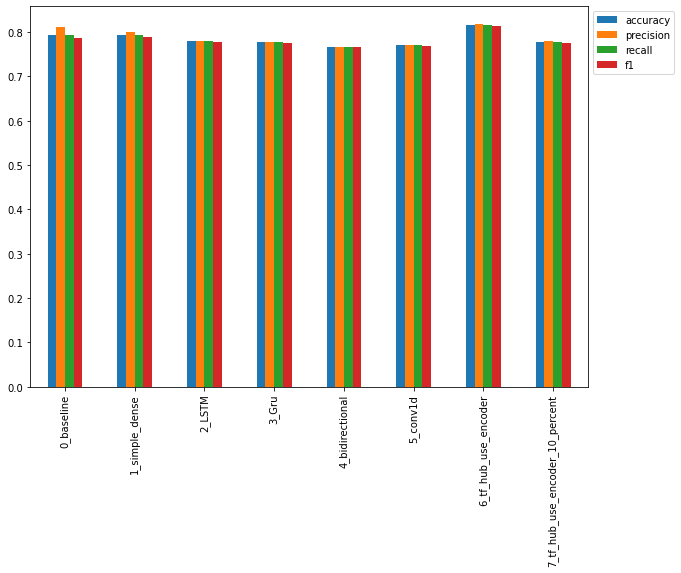

In [ ]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

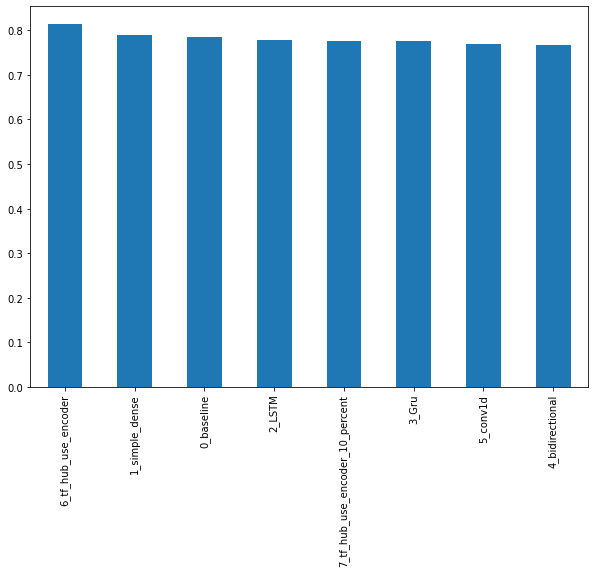

In [ ]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

In [ ]:
# # View tensorboard logs of transfer learning modelling experiments (should be 4 models)
# # Upload TensorBoard dev records
!tensorboard dev upload --logdir ./model_logs \
  --name "NLP modelling experiments" \
  --description "A series of different NLP modellings experiments with various models" \
  --one_shot # exits the uploader when upload has finished

2023-03-09 15:20:42.744543: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-09 15:20:42.744659: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-09 15:20:42.744681: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./model_logs

This TensorBoard wil

## Saving and loading a trained model

In [ ]:
# Save TF hub sentence encoder to .h5 format
model_6.save("model_6.h5")

In [ ]:
#Load model with custom hub layer
loaded_model_6=tf.keras.models.load_model("model_6.h5",
                                          custom_objects={"KerasLayer":hub.KerasLayer}
                                          )

In [ ]:
#How does oure model perform?
loaded_model_6.evaluate(val_sentences,val_labels)

24/24 [==============================] - 1s 11ms/step - loss: 0.4320 - accuracy: 0.8150


[0.4319933354854584, 0.8149606585502625]

In [ ]:
# Save TF Hub Sentence Encoder model to SavedModel format (default)
model_6.save("model_6_SavedModel_format")

In [ ]:
# Load TF Hub Sentence Encoder SavedModel
loaded_model_6_SavedModel = tf.keras.models.load_model("model_6_SavedModel_format")

In [ ]:
# Evaluate loaded SavedModel format
loaded_model_6_SavedModel.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 17ms/step - loss: 0.4320 - accuracy: 0.8150


[0.4319933354854584, 0.8149606585502625]

## Finding the most wrong examples

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip

--2023-03-09 15:28:57--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 172.253.117.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M   219MB/s    in 5.1s    

2023-03-09 15:29:02 (179 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]



In [ ]:
# Create DataFrame with validation sentences and best  performing model predictions
unzip_data("/content/08_model_6_USE_feature_extractor.zip")
model_6_pretrained=tf.keras.models.load_model("08_model_6_USE_feature_extractor")

In [ ]:
model_6_pretrained.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_11 (Dense)            (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
model_6_pretrained.evaluate(val_sentences,val_labels)

24/24 [==============================] - 2s 21ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723122239112854, 0.8162729740142822]

In [ ]:
model_6_pretrained_pred_probs=model_6_pretrained.predict(val_sentences)

24/24 [==============================] - 1s 24ms/step


In [ ]:
model_6_pretrained_preds=tf.squeeze(tf.round(model_6_pretrained_pred_probs))

In [ ]:
model_6_pretrained_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Create dataframe with validation sentences and best performing model predictions
val_df=pd.DataFrame({"text":val_sentences,
                     "target":val_labels,
                     "pred":model_6_pretrained_preds,
                     "pred_prob":tf.squeeze(model_6_pretrained_pred_probs)
                     })
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808


In [ ]:
# Find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong[:10] #False positive


,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
628,@noah_anyname That's where the concentration c...,0,1.0,0.852300
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.835454
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.827213
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.814816
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.810840
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.803122
119,@freefromwolves GodsLove &amp; #thankU brother...,0,1.0,0.766901
344,Air Group is here to the rescue! We have 24/7 ...,0,1.0,0.766625


In [ ]:
most_wrong.tail() #False negative

,text,target,pred,pred_prob
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.043919
233,I get to smoke my shit in peace,1,0.0,0.042087
38,Why are you deluged with low self-image? Take ...,1,0.0,0.038998
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.038949
23,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.037186


In [ ]:
#Check the false positive
for row in most_wrong[:10].itertuples():
  _,text,target,pred,pred_prob=row
  print(f"Target:{target} , Pred:{pred}, Prob:{pred_prob}")
  print(f"Text:\n {text} \n")
  print("----\n")

Target:0 , Pred:1.0, Prob:0.9101957678794861
Text:
 ? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying 

----

Target:0 , Pred:1.0, Prob:0.8769821524620056
Text:
 FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J 

----

Target:0 , Pred:1.0, Prob:0.8523001074790955
Text:
 @noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME. 

----

Target:0 , Pred:1.0, Prob:0.8354544043540955
Text:
 Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0 

----

Target:0 , Pred:1.0, Prob:0.8272132277488708
Text:
 @AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans. 

----

Target:0 , Pred:1.0, Prob:0.8148158192634583
Text:
 @SonofLiberty357 all illuminated by the brightly burning buildings all around the town! 

---

In [ ]:
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [ ]:
#Making predictions on test dataset
# Making predictions on the test dataset
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6.predict([test_sample])) # has to be list
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("----\n")

1/1 [==============================] - 0s 81ms/step
Pred: 0, Prob: 0.1964809149503708
Text:
Media stocks are getting destroyed (DIS FOXA CMCSA SNI AMCX VIAB VIA TWX) http://t.co/dQd3YtaZfG

----

1/1 [==============================] - 0s 61ms/step
Pred: 0, Prob: 0.04300571605563164
Text:
The midnight song I cry out goes 'In reality I... in reality I... was very lonely'
Even if it is erased by the blazing sun

----

1/1 [==============================] - 0s 65ms/step
Pred: 0, Prob: 0.4909617602825165
Text:
@emmap645 @Vickygeex @Zak_Bagans @NickGroff_ @AaronGoodwin A few friends of mine were up investigatin the hellfire last year they had loads

----

1/1 [==============================] - 0s 66ms/step
Pred: 0, Prob: 0.34463053941726685
Text:
5000 year old ring fort to be demolished http://t.co/kNLZfC8QSl

----

1/1 [==============================] - 0s 64ms/step
Pred: 1, Prob: 0.8562852740287781
Text:
Residents artists remember aftermath of Hurricane Katrina through artwork - WDSU New O

## The speed/score tradeoff

In [ ]:
model_6_results

{'accuracy': 81.49606299212599,
 'precision': 0.8172549323109193,
 'recall': 0.8149606299212598,
 'f1': 0.8134357776936025}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [ ]:
# Calculate the time of predictions
import time
def pred_timer(model, samples):
  """
  Times how long a model takes to make predictions on samples.
  
  Args:
  ----
  model = a trained model
  sample = a list of samples

  Returns:
  ----
  total_time = total elapsed time for model to make predictions on samples
  time_per_pred = time in seconds per single sample
  """
  start_time = time.perf_counter() # get start time
  model.predict(samples) # make predictions
  end_time = time.perf_counter() # get finish time
  total_time = end_time-start_time # calculate how long predictions took to make
  time_per_pred = total_time/len(val_sentences) # find prediction time per sample
  return total_time, time_per_pred

In [ ]:
# Calculate TF Hub Sentence Encoder prediction times
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model_6, val_sentences)
model_6_total_pred_time, model_6_time_per_pred

24/24 [==============================] - 0s 10ms/step


(0.29866196700095315, 0.000391944838583928)

In [ ]:
# Calculate Naive Bayes prediction times
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, val_sentences)
baseline_total_pred_time, baseline_time_per_pred

(0.019965989000411355, 2.6202085302377105e-05)

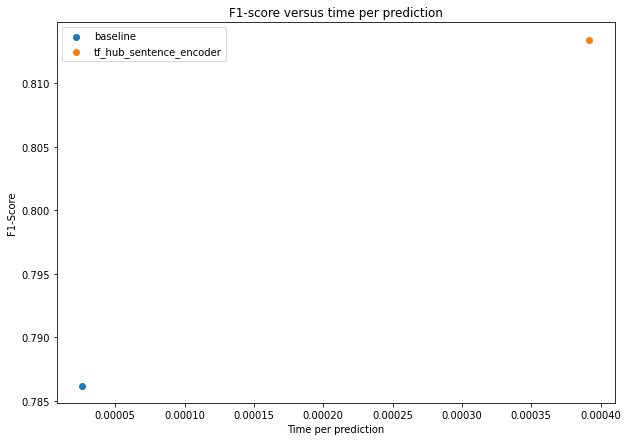

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(baseline_time_per_pred, baseline_results["f1"], label="baseline")
plt.scatter(model_6_time_per_pred, model_6_results["f1"], label="tf_hub_sentence_encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-Score");